In [18]:
import numpy as np
import pandas as pd


In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [20]:
df.dropna(inplace=True)

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df = df[~(df.clean_comment.str.strip() == "")]

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [24]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def preprocess_comment(comment):

  #Convert to lowercase
  comment = comment.lower()

  #Rmove the trailing and leading whitespaces
  comment = comment.strip()

  #Remove newline character
  comment = re.sub('\n',' ',comment)

  #Remove non-alphanumeric character except pucntuation
  comment = re.sub(r'[^a-zA-Z0-9\s!?.,]','',comment)

  #Remove stopwords but retain the important ones
  stop_words = set(stopwords.words('english')) - {'not','no','but','however','yet'}
  comment = ' '.join([word for word in comment.split() if word not in stop_words])

  #Lemmatize the
  lemmatizer = WordNetLemmatizer()
  comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

  return comment

In [26]:
#Apply the preprocessing step to clean the commment
df['clean_comment'] = df.clean_comment.apply(preprocess_comment)

In [ ]:
df.to_csv('reddit_preprocessing.csv',index=False)
df.head()

In [27]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# step1 Vectorize the comment by bow
vectorizer = CountVectorizer(max_features=10000)

In [29]:
import pandas as pd

# # We use 'r' to handle the backslashes correctly
# file_path = r"c:\Users\ritik\OneDrive\Desktop\reddit-comment-sentiment-analysis\data\processed\reddit_preprocessing.csv"

# df = pd.read_csv(file_path)
# print("File loaded successfully!")
# print(df.head())
X_train, X_test, y_train, y_test = train_test_split(df.clean_comment, df.category, test_size=0.2, random_state=42)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [31]:
# Set or create an experiment
# mlflow.set_tracking_uri('http://127.0.0.1:5000')
import dagshub
dagshub.init(repo_owner='Ritk-Raikwar', repo_name='reddit-comment-sentiment-analysis', mlflow=True)
mlflow.set_experiment("RF Baseline")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=01cdfa4f-1333-490f-8f78-13d8dc75119f&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=85b2400a608f1d96ee5bd44c633115c5c025527740737feba2e3c4e5423e803d




Accessing as Ritk-Raikwar

Initialized MLflow to track repo "Ritk-Raikwar/reddit-comment-sentiment-analysis"

Repository Ritk-Raikwar/reddit-comment-sentiment-analysis initialized!

2026/02/12 23:31:24 INFO mlflow.tracking.fluent: Experiment with name 'RF Baseline' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/203ea08cd90b4a18a73bbecb4bd2c6f9', creation_time=1770919278509, experiment_id='0', last_update_time=1770919278509, lifecycle_stage='active', name='RF Baseline', tags={}>

2026/02/12 23:31:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\ritik\OneDrive\Desktop\reddit-comment-sentiment-analysis\myenv\Lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run RandomForest_Baseline_TrainTestSplit at: https://dagshub.com/Ritk-Raikwar/reddit-comment-sentiment-analysis.mlflow/#/experiments/0/runs/52154055d242433da9f49a23edee2d33
🧪 View experiment at: https://dagshub.com/Ritk-Raikwar/reddit-comment-sentiment-analysis.mlflow/#/experiments/0
Accuracy: 0.6517189835575485


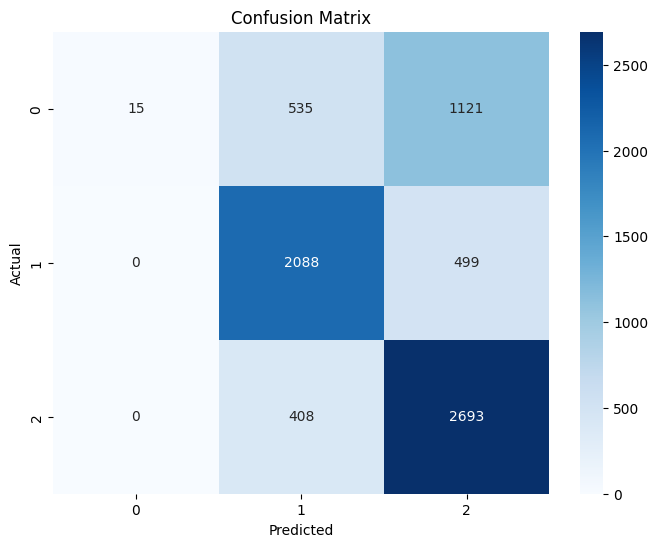

In [32]:
with mlflow.start_run() as run:
  #Log a description for a run
  mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
  mlflow.set_tag('experiment_type','baseline')
  mlflow.set_tag('model_type','RandomForestClassifier')

  #Add a description
  mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of Words (BoW) with a simple train-test split")

  #Log parameter for vectorizer
  mlflow.log_param("vectorizer_type",'CountVectorizer')
  mlflow.log_param("vecorizer_max_features",vectorizer.max_features)

  # Log Random Forest parameters
  n_estimators = 200
  max_depth = 15

  mlflow.log_param("n_estimators", n_estimators)
  mlflow.log_param("max_depth", max_depth)

  # Initialize and train the model
  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
  model.fit(X_train_vec, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test_vec)

  # Log metrics for each class and accuracy
  accuracy = accuracy_score(y_test, y_pred)
  mlflow.log_metric("accuracy", accuracy)

  classification_rep = classification_report(y_test, y_pred, output_dict=True)

  for label, metrics in classification_rep.items():
    if isinstance(metrics, dict):
      for metric_name, metric_value in metrics.items():
        mlflow.log_metric(f"{label}_{metric_name}",metric_value)

  # Confusion matrix plot
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")

  # Save and log the confusion matrix plot
  plt.savefig("confusion_matrix.png")
  mlflow.log_artifact("confusion_matrix.png")

  # Log the Random Forest model
  mlflow.sklearn.log_model(model, "random_forest_model")

  # Optionally log the dataset itself (if it's small enough)
  df.to_csv("dataset.csv", index=False)
  

# Display final accuracy
print(f"Accuracy: {accuracy}")

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02      1671
           0       0.69      0.81      0.74      2587
           1       0.62      0.87      0.73      3101

    accuracy                           0.65      7359
   macro avg       0.77      0.56      0.50      7359
weighted avg       0.73      0.65      0.57      7359

